# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import gmaps

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# CHANGE SIZE BACK TO 1500
# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retrieval")
print("-" * 30)
set = 1
count = 1
for city in cities:
    try:
        print(f"Processing Record {count} | {city}")
        query_url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        #Append results to the empty lists
        city_name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(str(datetime.datetime.now()))
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        count += 1
    except KeyError:
        print("City not found. Skipping...")
print("-"*30)
print("Data Retrieval Complete")



Beginning Data Retrieval
------------------------------
Processing Record 1 | rikitea
Processing Record 2 | albany
Processing Record 3 | pevek
Processing Record 4 | havre-saint-pierre
Processing Record 5 | taolanaro
City not found. Skipping...
Processing Record 5 | kapustin yar-1
City not found. Skipping...
Processing Record 5 | saint-philippe
Processing Record 6 | axim
Processing Record 7 | busselton
Processing Record 8 | ust-maya
Processing Record 9 | port elizabeth
Processing Record 10 | saskylakh
Processing Record 11 | traverse city
Processing Record 12 | mataura
Processing Record 13 | saint george
Processing Record 14 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 | tuktoyaktuk
Processing Record 15 | punta arenas
Processing Record 16 | azimur
City not found. Skipping...
Processing Record 16 | souillac
Processing Record 17 | ushuaia
Processing Record 18 | namibe
Processing Record 19 | northam
Processing Record 20 | nara
Processing Record 21 | bengkulu
City not 

Processing Record 206 | isakly
Processing Record 207 | naze
Processing Record 208 | inongo
Processing Record 209 | calamar
Processing Record 210 | hay river
Processing Record 211 | norman wells
Processing Record 212 | belmonte
Processing Record 213 | cockburn town
Processing Record 214 | kavieng
Processing Record 215 | kushmurun
City not found. Skipping...
Processing Record 215 | buala
Processing Record 216 | omboue
Processing Record 217 | lompoc
Processing Record 218 | nanortalik
Processing Record 219 | bara
Processing Record 220 | lagoa
Processing Record 221 | mangai
Processing Record 222 | kathmandu
Processing Record 223 | presidente epitacio
Processing Record 224 | port-gentil
Processing Record 225 | katsuura
Processing Record 226 | bethel
Processing Record 227 | vitim
Processing Record 228 | curvelo
Processing Record 229 | thompson
Processing Record 230 | yellowknife
Processing Record 231 | kloulklubed
Processing Record 232 | geraldton
Processing Record 233 | gizo
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [254]:

cities_df = pd.DataFrame({'City': city_name,
                          'Cloudiness': cloudiness,
                          'Country': country,
                          'Date': date,
                          'Humidity': humidity,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Max Temp': max_temp,
                          'Wind Speed': wind_speed
                         })
cities_df.head()
cities_df.to_csv("city_temps.csv", encoding="utf-8", index=False)

In [255]:
cities_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Latitude      567
Longitude     567
Max Temp      567
Wind Speed    567
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [256]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Rikitea,80,PF,<built-in method now of type object at 0x00007...,99,-23.12,-134.97,79.49,15.21
1,Albany,75,US,<built-in method now of type object at 0x00007...,53,42.65,-73.75,15.98,5.82
2,Pevek,0,RU,<built-in method now of type object at 0x00007...,72,69.70,170.27,-23.92,6.15
3,Havre-Saint-Pierre,90,CA,<built-in method now of type object at 0x00007...,66,50.23,-63.60,15.80,9.17
4,Saint-Philippe,1,CA,<built-in method now of type object at 0x00007...,84,45.36,-73.48,1.40,2.80


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

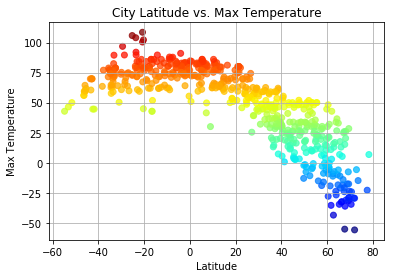

In [173]:
plt.scatter(lat, max_temp, marker="o", c=max_temp, cmap="jet", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.show


#### Latitude vs. Humidity Plot

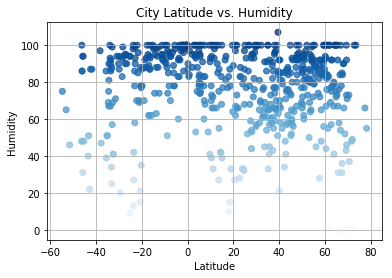

In [175]:
plt.scatter(lat, humidity, marker="o", c=humidity, cmap="Blues", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

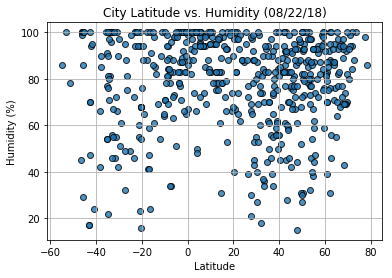

#### Latitude vs. Cloudiness Plot

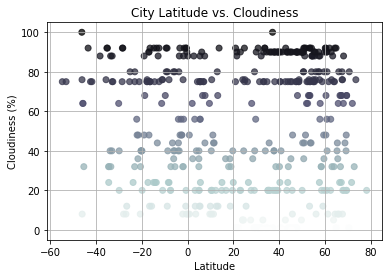

In [178]:
plt.scatter(lat, cloudiness, marker="o", c=cloudiness, cmap="bone_r", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

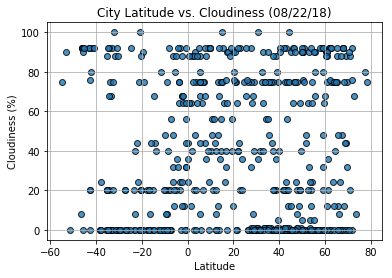

#### Latitude vs. Wind Speed Plot

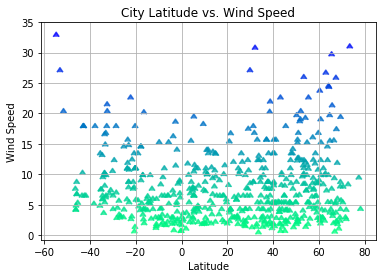

In [263]:
plt.scatter(lat, wind_speed, marker=6, c=wind_speed, cmap="winter_r", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

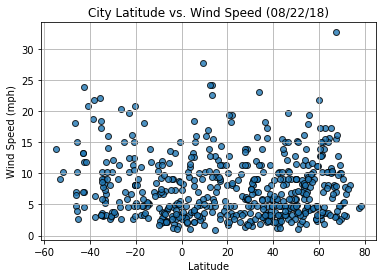

In [195]:
locations = cities_df[['Latitude', 'Longitude']].astype(float)
humid = cities_df['Humidity'].astype(float)


center=(0.0,0.0)
fig = gmaps.figure(center=center, zoom_level=1)

heat_layer = gmaps.heatmap_layer(locations, weights=humid, dissipating=False, max_intensity=100, point_radius=4)


fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [248]:


locations = cities_df[['Latitude', 'Longitude']].astype(float)
clouds = cities_df['Cloudiness'].astype(float)

center=(0.0,0.0)
fig = gmaps.figure(center=center, zoom_level=1)

heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=50, point_radius=4)
heat_layer.gradient = ['white', 'silver', 'gray']

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [252]:
str(datetime.datetime.now())

'2019-01-13 00:54:23.633294'